<a href="https://colab.research.google.com/github/ED19841002/testrepo/blob/main/Laptop_pred_GenAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import normalize, StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score, classification_report
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import TransformedTargetRegressor

In [2]:
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod2.csv"
df = pd.read_csv(URL)

In [3]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,0,0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,1,1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,2,2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,3,3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,4,4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0


In [4]:
df.isnull().sum()

,0
Unnamed: 0.1,0
Unnamed: 0,0
Manufacturer,0
Category,0
GPU,0
OS,0
CPU_core,0
Screen_Size_inch,0
CPU_frequency,0
RAM_GB,0


In [5]:
df.dtypes

,0
Unnamed: 0.1,int64
Unnamed: 0,int64
Manufacturer,object
Category,int64
GPU,int64
OS,int64
CPU_core,int64
Screen_Size_inch,float64
CPU_frequency,float64
RAM_GB,int64


In [6]:
df.select_dtypes(include=np.number).corr()['Price'].drop('Price')

,Price
Unnamed: 0.1,0.321933
Unnamed: 0,0.321933
Category,0.286243
GPU,0.288298
OS,-0.221730
CPU_core,0.459398
Screen_Size_inch,-0.110644
CPU_frequency,0.366666
RAM_GB,0.549297
Storage_GB_SSD,0.243421


In [7]:
X = StandardScaler().fit_transform(df[['RAM_GB']])
y = StandardScaler().fit_transform(df[['Price']])

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
lr = LinearRegression()
lr.fit(X_train, y_train)
yhat = lr.predict(X_test)
print(f'MSE = {mean_squared_error(y_test, yhat):.2f} \nR^2 = {r2_score(y_test, yhat):.2f}')

MSE = 0.68 
R^2 = 0.03


In [10]:
X = StandardScaler().fit_transform(df[['CPU_frequency']])
y = StandardScaler().fit_transform(df[['Price']])

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
lr = LinearRegression()
lr.fit(X_train, y_train)
yhat = lr.predict(X_test)
print(f'MSE = {mean_squared_error(y_test, yhat):.2f} \nR^2 = {r2_score(y_test, yhat):.2f}')

MSE = 0.73 
R^2 = -0.04


In [13]:
lr.score(X_test, y_test)

-0.037194178334964745

In [14]:
X = StandardScaler().fit_transform(df[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU' , 'Category']])
y = StandardScaler().fit_transform(df[['Price']])

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
lr = LinearRegression()
lr.fit(X_train, y_train)
yhat = lr.predict(X_test)
print(f'MSE = {mean_squared_error(y_test, yhat):.2f} \nR^2 = {r2_score(y_test, yhat):.2f}')

MSE = 0.51 
R^2 = 0.27


In [17]:
X = StandardScaler().fit_transform(df[['CPU_frequency']])
y = StandardScaler().fit_transform(df[['Price']])

Order = 2
MSE = 0.76 
R^2 = 0.24


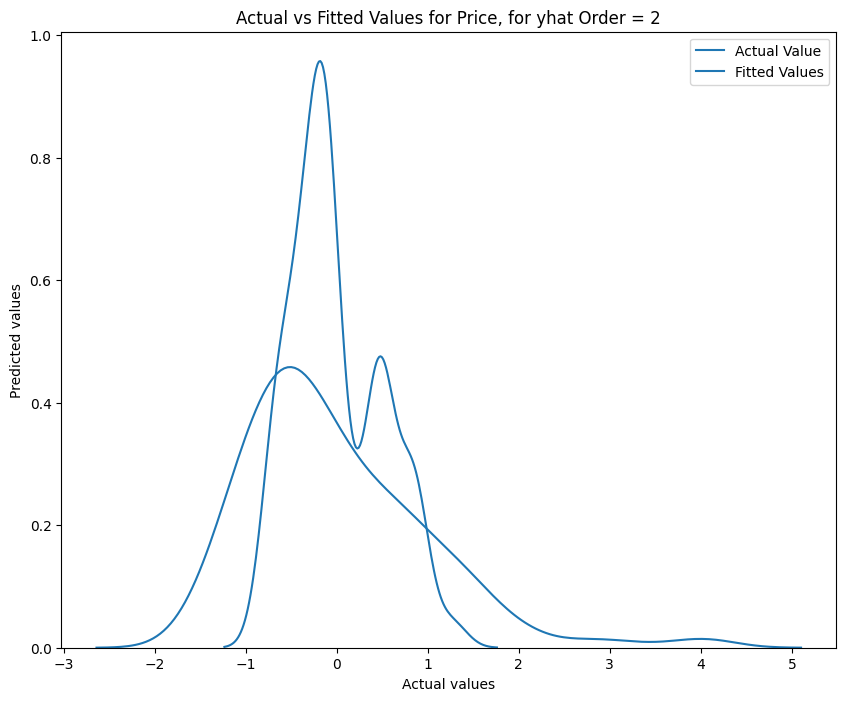


Order = 3
MSE = 0.73 
R^2 = 0.27


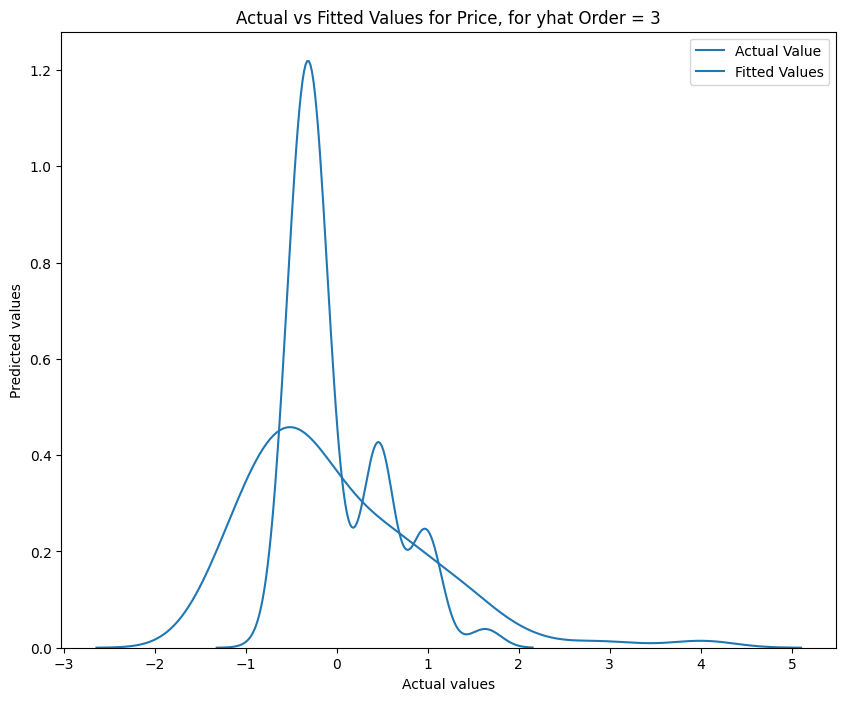


Order = 4
MSE = 0.72 
R^2 = 0.28


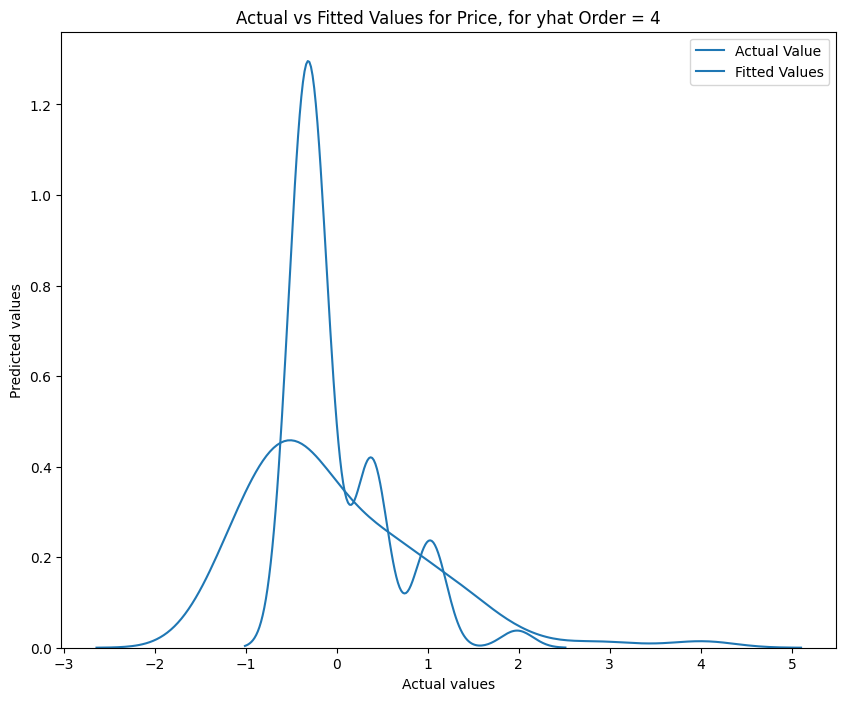


Order = 5
MSE = 0.70 
R^2 = 0.30


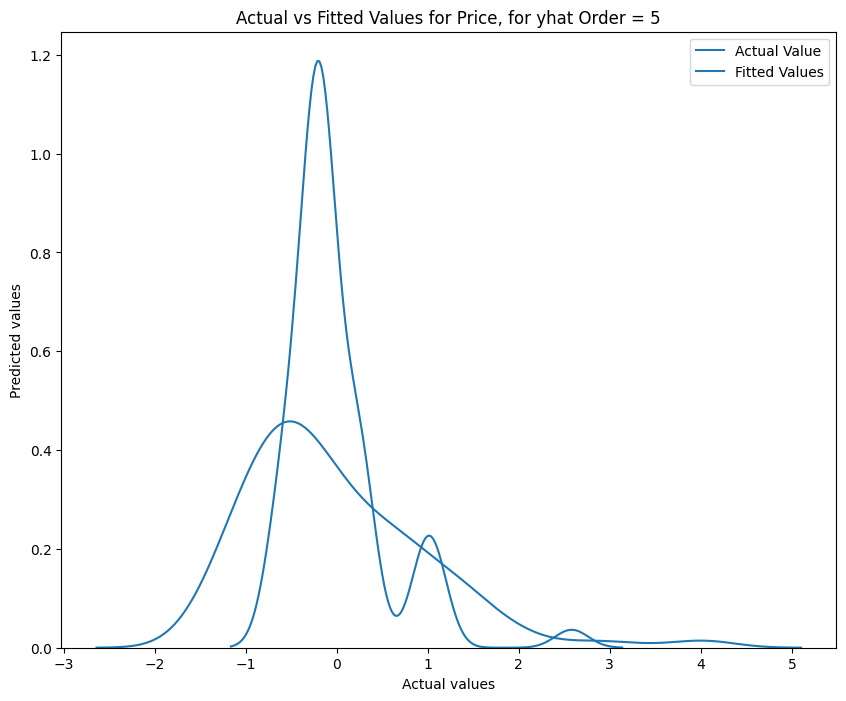


Order = 6
MSE = 0.69 
R^2 = 0.31


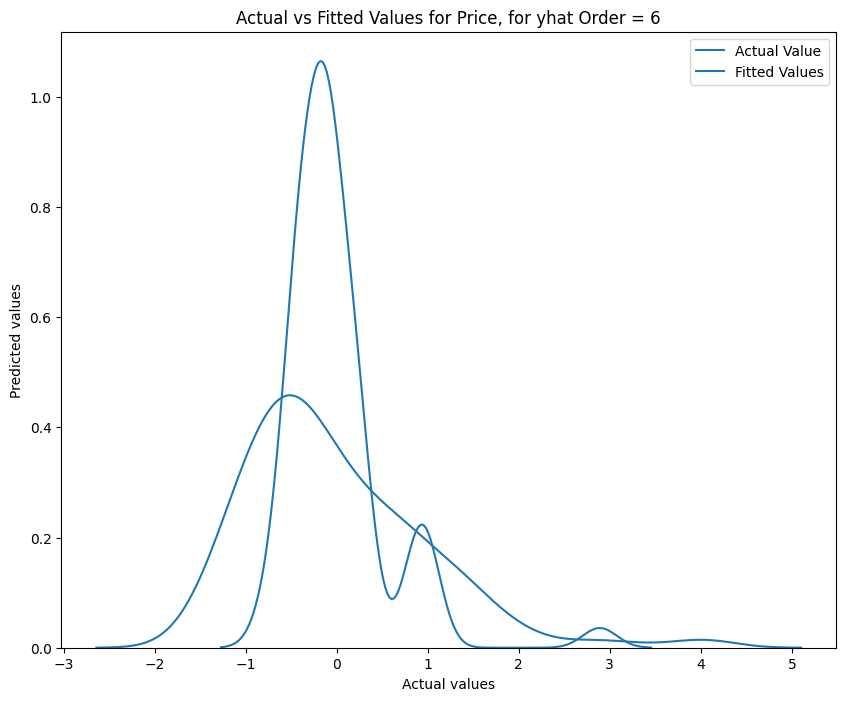


Order = 7
MSE = 0.67 
R^2 = 0.33


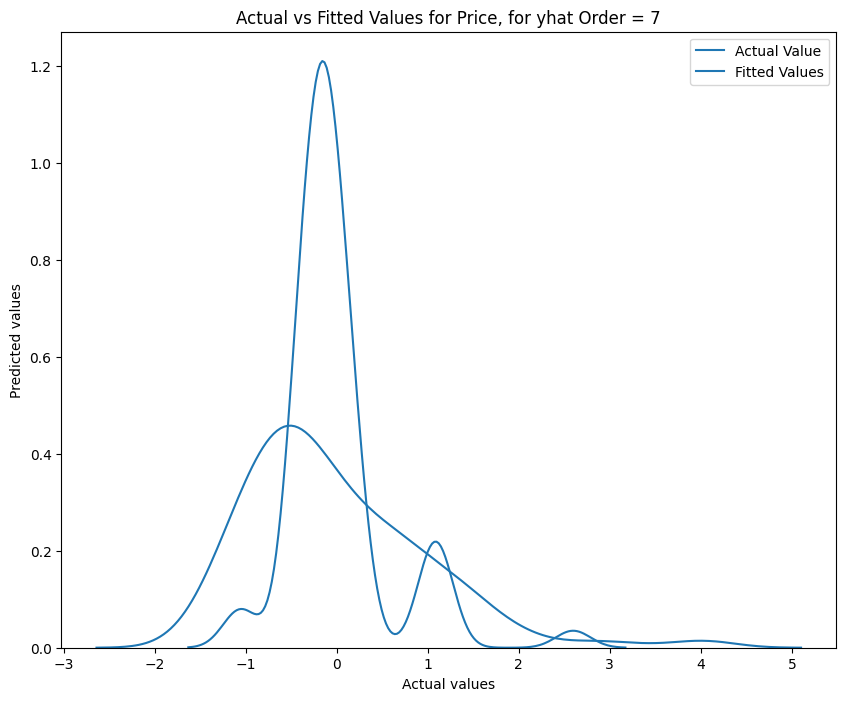

In [18]:
width = 10
height = 8
mse_values = []
r2_values = []
for order in range(2, 8):
  polynomial_features = PolynomialFeatures(degree=order)
  X_poly = polynomial_features.fit_transform(X)

  lr = LinearRegression()
  lr.fit(X_poly, y)
  yhat = lr.predict(X_poly)
  mse = mean_squared_error(y, yhat)
  r2 = r2_score(y, yhat)
  print(f'Order = {order}\nMSE = {mse:.2f} \nR^2 = {r2:.2f}')

  plt.figure(figsize=(width,height))

  ax = sns.kdeplot(y, color='r', label="Actual Value")
  sns.kdeplot(yhat, color='b', label="Fitted Values", ax=ax)

  plt.title(f"Actual vs Fitted Values for Price, for yhat Order = {order}")
  plt.xlabel("Actual values")
  plt.ylabel("Predicted values")

  plt.legend()

  plt.show()
  plt.close()

  print("")

  mse_values.append(mse)
  r2_values.append(r2)

In [19]:
best_order = np.argmin(mse_values)
worst_order = np.argmax(mse_values)
print("Model Comparison:")
print(f"Best Polynomial Order: {best_order + 2}")
print(f"Worst Polynomial Order: {worst_order + 2}")

Model Comparison:
Best Polynomial Order: 7
Worst Polynomial Order: 2


In [20]:
X = StandardScaler().fit_transform(df[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU' , 'Category']])
y = StandardScaler().fit_transform(df[['Price']])

Order = 2
MSE = 0.37 
R^2 = 0.63


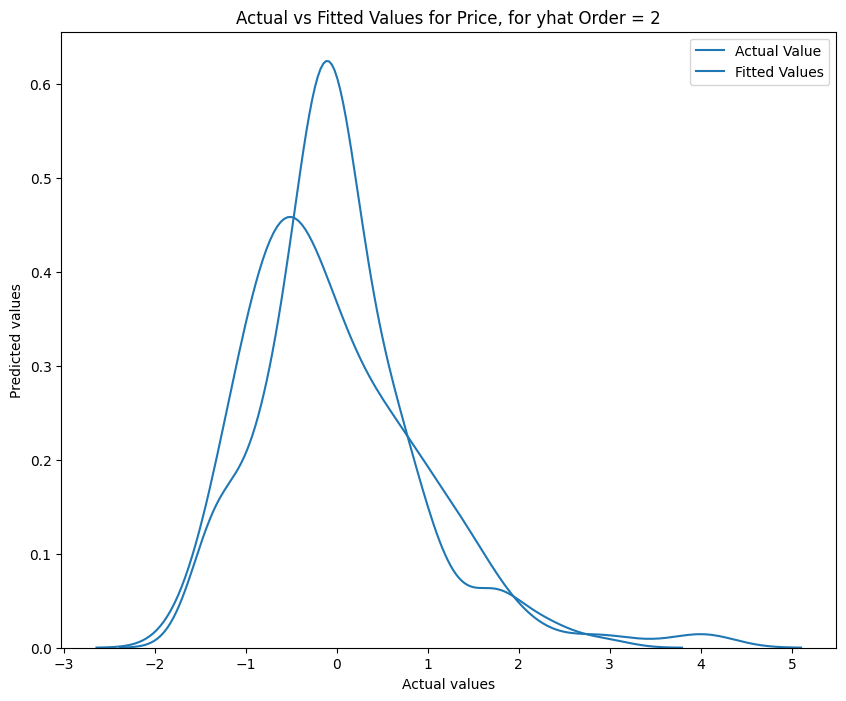


Order = 3
MSE = 0.27 
R^2 = 0.73


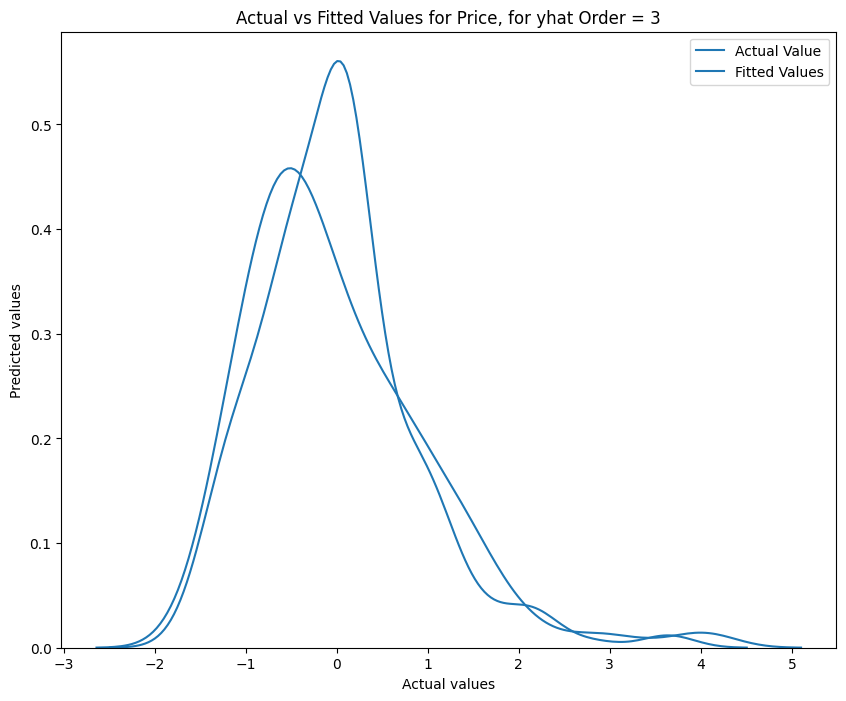


Order = 4
MSE = 0.23 
R^2 = 0.77


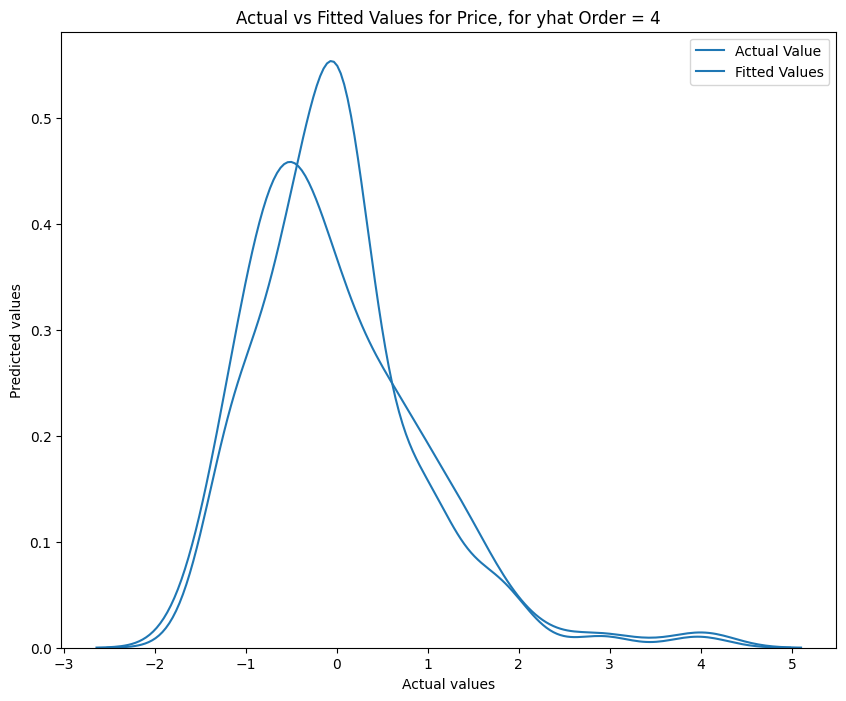


Order = 5
MSE = 0.19 
R^2 = 0.81


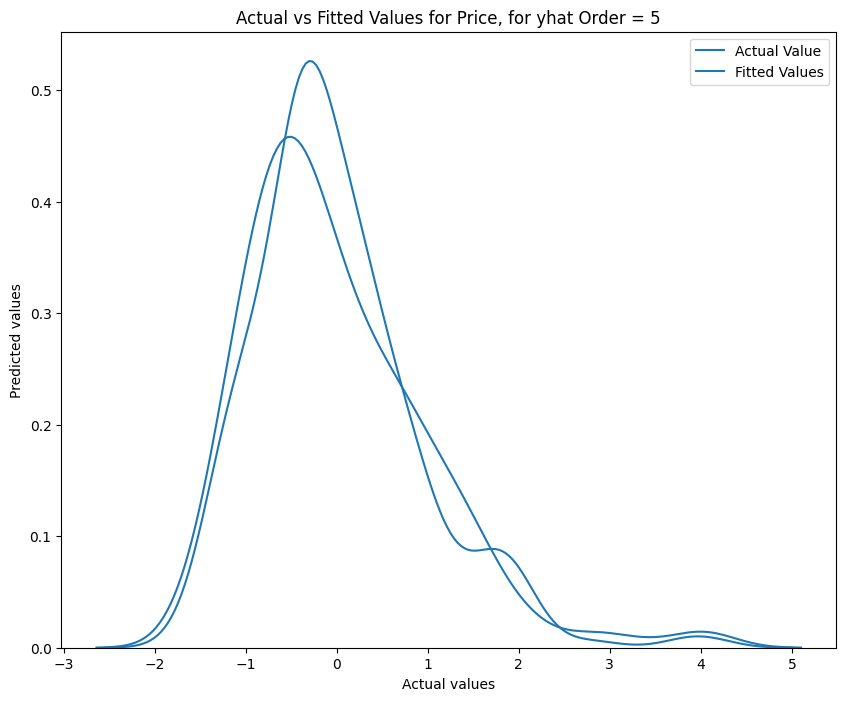


Order = 6
MSE = 0.19 
R^2 = 0.81


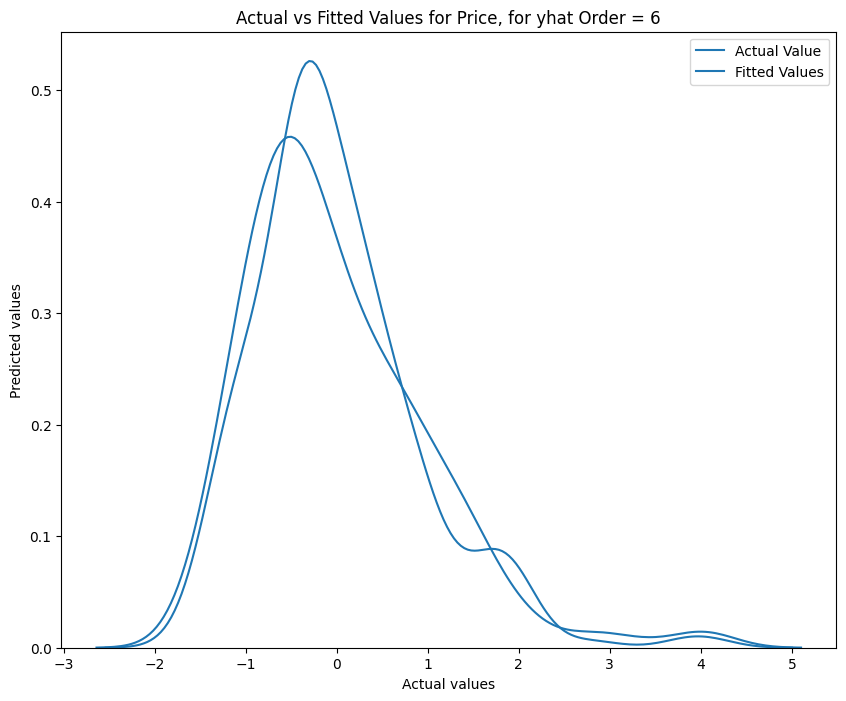


Order = 7
MSE = 0.19 
R^2 = 0.81


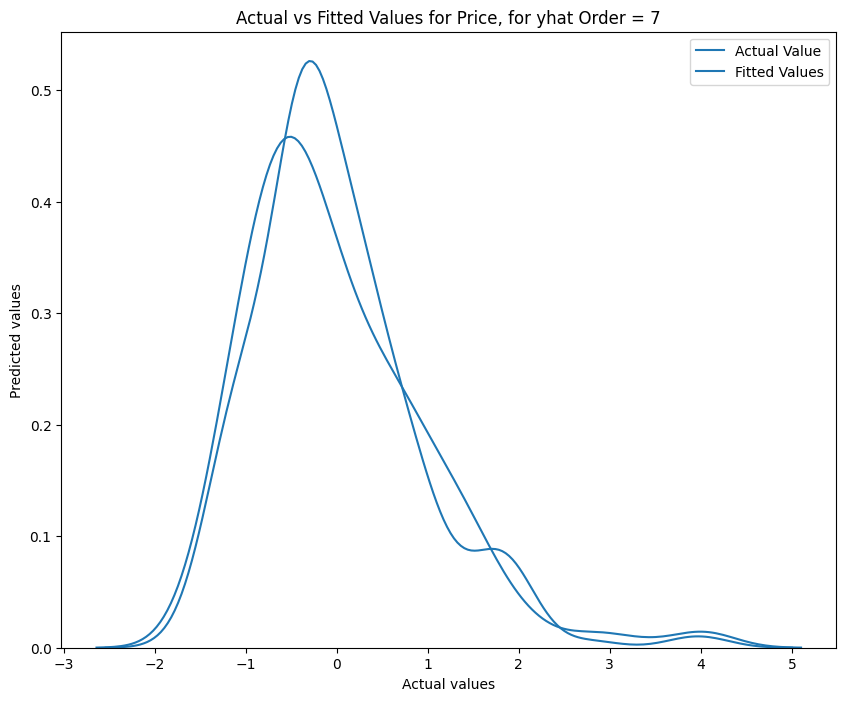

In [21]:
width = 10
height = 8
mse_values = []
r2_values = []
for order in range(2, 8):
  polynomial_features = PolynomialFeatures(degree=order)
  X_poly = polynomial_features.fit_transform(X)

  lr = LinearRegression()
  lr.fit(X_poly, y)
  yhat = lr.predict(X_poly)
  mse = mean_squared_error(y, yhat)
  r2 = r2_score(y, yhat)
  print(f'Order = {order}\nMSE = {mse:.2f} \nR^2 = {r2:.2f}')

  plt.figure(figsize=(width,height))

  ax = sns.kdeplot(y, color='r', label="Actual Value")
  ax1= sns.kdeplot(yhat, color='b', label="Fitted Values", ax=ax)

  plt.title(f"Actual vs Fitted Values for Price, for yhat Order = {order}")
  plt.xlabel("Actual values")
  plt.ylabel("Predicted values")

  plt.legend()

  plt.show()
  plt.close()

  print("")

  mse_values.append(mse)
  r2_values.append(r2)

In [22]:
best_order = np.argmin(mse_values)
worst_order = np.argmax(mse_values)
print("Model Comparison:")
print(f"Best Polynomial Order: {best_order + 2}")
print(f"Worst Polynomial Order: {worst_order + 2}")

Model Comparison:
Best Polynomial Order: 7
Worst Polynomial Order: 2


In [23]:
X = df[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU' , 'Category']]
y = df[['Price']]

In [24]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(degree= 5, include_bias=False)), ('model',LinearRegression())]
pipe = Pipeline(Input)
X = X.astype(float)
pipe.fit(X, y)
ypipe = pipe.predict(X)
mse_pipe = mean_squared_error(y, ypipe)
r2_score_pipe = r2_score(y, ypipe)
print(f'MSE for multi-variable polynomial pipeline ypipe1 is: {mse_pipe:.2f}')
print(f'R^2 for multi-variable polynomial pipeline ypipe1 is: {r2_score_pipe:.2f}')

MSE for multi-variable polynomial pipeline ypipe1 is: 62929.54
R^2 for multi-variable polynomial pipeline ypipe1 is: 0.81


In [25]:
X = df[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU' , 'Category']]
y = df[['Price']]

In [26]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(degree= 5, include_bias=False)), ('model',Ridge(alpha=0.0001))]
pipe = Pipeline(Input)
X = X.astype(float)
pipe.fit(X, y)
ypipe = pipe.predict(X)
mse_pipe = mean_squared_error(y, ypipe)
r2_score_pipe = r2_score(y, ypipe)
print(f'MSE for multi-variable polynomial pipeline ypipe1 is: {mse_pipe:.2f}')
print(f'R^2 for multi-variable polynomial pipeline ypipe1 is: {r2_score_pipe:.2f}')

MSE for multi-variable polynomial pipeline ypipe1 is: 63863.55
R^2 for multi-variable polynomial pipeline ypipe1 is: 0.81


In [27]:
# Create Scaler
X = StandardScaler().fit_transform(df[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU' , 'Category']])
y = StandardScaler().fit_transform(df[['Price']])

# Create polynomial features
polynomial_features = PolynomialFeatures(degree=8)

# Transform the source variables into polynomial features
X_poly = polynomial_features.fit_transform(X)

# Define the hyperparameter values for the grid search
param_grid = {'alpha': [0.0001, 0.001,0.01, 0.1, 1.0, 10.0]}

# Initialize a ridge regression model
model = Ridge()

# Perform grid search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5,
                           scoring={'accuracy': 'accuracy', 'precision': 'precision_weighted', 'recall':'recall_weighted', 'f1':'f1_weighted'},
                           n_jobs=-1, verbose=2, refit='accuracy')

# Train the model using the polynomial features and target variable
grid_search.fit(X_poly, y)

#Check the best parameters and estimator:
print('Best parameters found:', grid_search.best_params_)
print('Best estimator:', grid_search.best_estimator_)

#Make predictions with the best estimator:
y_pred = grid_search.best_estimator_.predict(X_poly)


# Calculate the mean squared error (MSE)
mse = mean_squared_error(y, y_pred)

# Calculate the coefficient of determination (R^2)
r2 = r2_score(y, y_pred)

# Display the MSE and R^2 values
print("Mean Squared Error (MSE):", mse)
print("Coefficient of Determination (R^2):", r2)

# Additional details:
# - The 'PolynomialFeatures' class from the 'sklearn.preprocessing' module is used to create polynomial features.
# - The 'GridSearchCV' class from the 'sklearn.model_selection' module is used to perform grid search with cross-validation.
# - The 'Ridge' class from the 'sklearn.linear_model' module is used for ridge regression.
# - The 'fit_transform()' method is used to transform the source variables into polynomial features.
# - The 'param_grid' parameter in the 'GridSearchCV' class specifies the hyperparameter values to search over.
# - The 'cv' parameter in the 'GridSearchCV' class specifies the number of folds for cross-validation.
# - The best model found by grid search can be accessed using the 'best_estimator_' attribute of the grid search object.

Fitting 5 folds for each of 6 candidates, totalling 30 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan]
  warnings.warn(


Best parameters found: {'alpha': 0.0001}
Best estimator: Ridge(alpha=0.0001)
Mean Squared Error (MSE): 0.1914548807951778
Coefficient of Determination (R^2): 0.8085451192048222


In [28]:

X = df[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU' , 'Category']]
y = df[['Price']]

# Create polynomial features
polynomial_features = PolynomialFeatures(degree=2)

# Transform the source variables into polynomial features
X_poly = polynomial_features.fit_transform(X)

#Split training and testing data
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Create Scaler, beacause the penalty depends on the magnitude of the coefficients
X_train_scaled = StandardScaler().fit_transform(X_train)
X_test_scaled = StandardScaler().fit_transform(X_test)
y_train_scaled = StandardScaler().fit_transform(y_train)
y_test_scaled = StandardScaler().fit_transform(y_test)

# Define the hyperparameter values for the grid search
param_grid = {'alpha': [0.0001, 0.001,0.01, 0.1, 1.0, 10.0]}

# Initialize a ridge regression model
model = Ridge()

# Perform grid search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5,
                           scoring={'accuracy': 'accuracy', 'precision': 'precision_weighted', 'recall':'recall_weighted', 'f1':'f1_weighted'},
                           n_jobs=-1, verbose=2, refit='accuracy')

# Train the model using the polynomial features and target variable
grid_search.fit(X_train_scaled, y_train_scaled)

#Check the best parameters and estimator:
print('Best parameters found:', grid_search.best_params_)
print('Best estimator:', grid_search.best_estimator_)

#Make predictions with the best estimator:
y_pred = grid_search.best_estimator_.predict(X_test_scaled)


# Calculate the mean squared error (MSE)
mse = mean_squared_error(y_test_scaled, y_pred)

# Calculate the coefficient of determination (R^2)
r2 = r2_score(y_test_scaled, y_pred)

# Display the MSE and R^2 values
print("Mean Squared Error (MSE):", mse)
print("Coefficient of Determination (R^2):", r2)

# Additional details:
# - The 'PolynomialFeatures' class from the 'sklearn.preprocessing' module is used to create polynomial features.
# - The 'GridSearchCV' class from the 'sklearn.model_selection' module is used to perform grid search with cross-validation.
# - The 'Ridge' class from the 'sklearn.linear_model' module is used for ridge regression.
# - The 'fit_transform()' method is used to transform the source variables into polynomial features.
# - The 'param_grid' parameter in the 'GridSearchCV' class specifies the hyperparameter values to search over.
# - The 'cv' parameter in the 'GridSearchCV' class specifies the number of folds for cross-validation.
# - The best model found by grid search can be accessed using the 'best_estimator_' attribute of the grid search object.

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters found: {'alpha': 0.0001}
Best estimator: Ridge(alpha=0.0001)
Mean Squared Error (MSE): 0.44680490456535793
Coefficient of Determination (R^2): 0.5531950954346421


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan]
  warnings.warn(


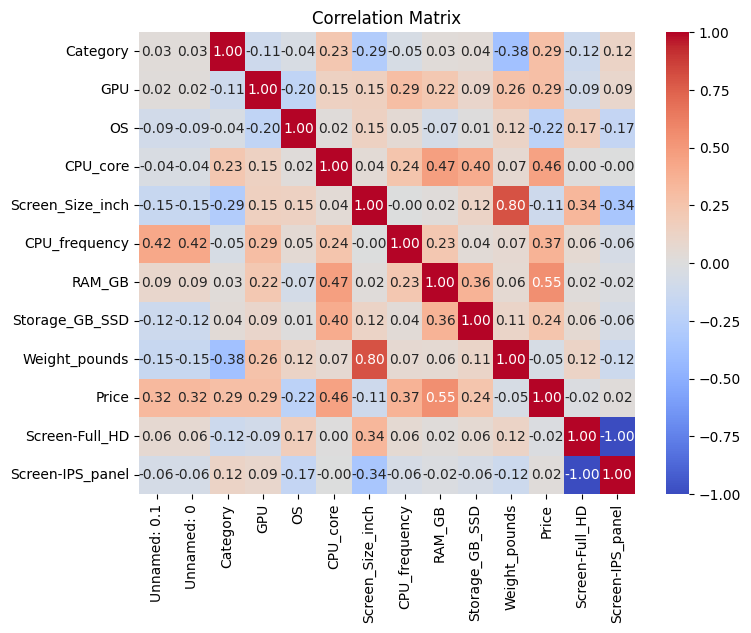

In [34]:
corr_matrix = df.select_dtypes(include=np.number).corr().drop(['Unnamed: 0.1', 'Unnamed: 0'])
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()